In [1]:
from Fraud_Detection.Configuration.configuration import *
from Fraud_Detection.components.data_ingestion import DataIngestion

config = Config(r'E:\MACHINE_LEARNING\Real_Time_Fraud_Detection_in_Financial_Transactions\config\config.yaml')
data_ingestion_config = config.data_ingestion()

data_ingestion = DataIngestion(data_ingestion_config)
dataset_path = data_ingestion.download_dataset()

In [2]:
dataset_path

'e:\\MACHINE_LEARNING\\Real_Time_Fraud_Detection_in_Financial_Transactions\\artifact\\data_ingestion\\2024-10-02-12-30-28\\creditcard.csv'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
df = pd.read_csv(dataset_path)

In [18]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head(5))

First few rows of the dataset:
   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


In [19]:
# Get basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [20]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [21]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  1.168375e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


In [22]:
# Check the shape of the dataset
print("\nDataset Shape:")
print(df.shape)


Dataset Shape:
(284807, 31)


In [23]:
# Check the distribution of the 'Class' column (0: Non-fraud, 1: Fraud)
print("\nClass distribution (0: Non-fraud, 1: Fraud):")
print(df['Class'].value_counts())


Class distribution (0: Non-fraud, 1: Fraud):
Class
0    284315
1       492
Name: count, dtype: int64


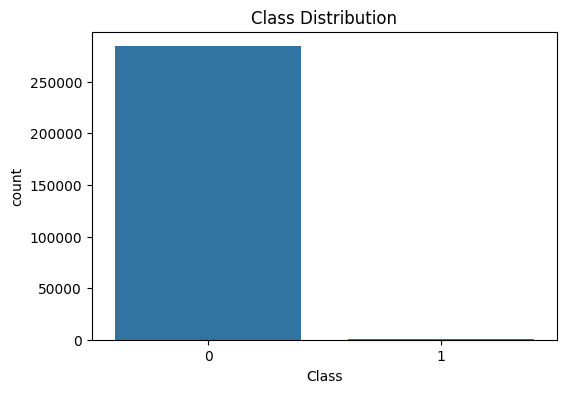

In [11]:
# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

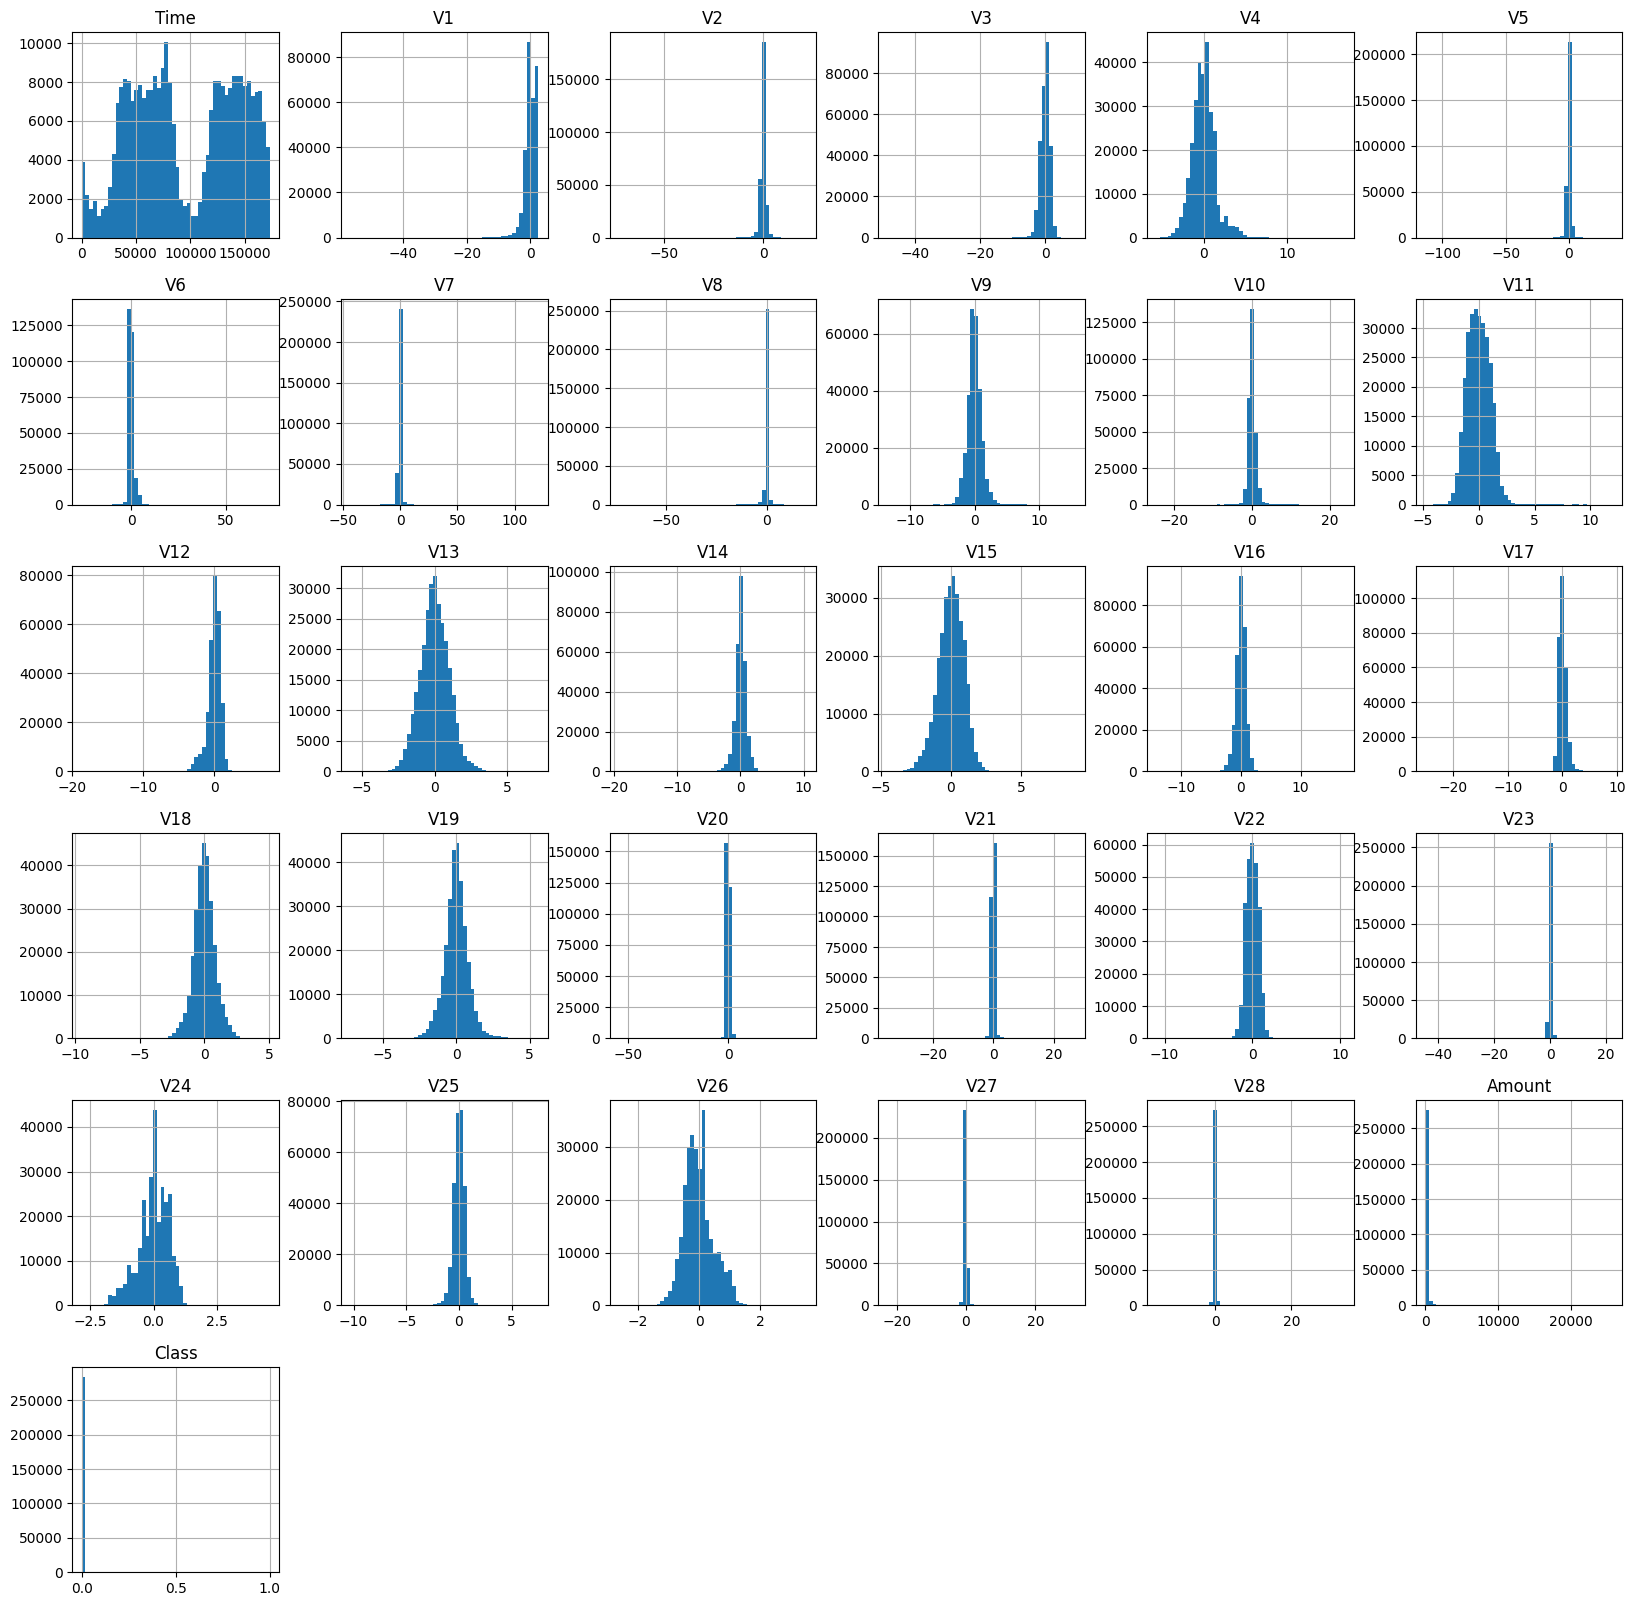

In [12]:
# Visualize the distribution of each numerical feature (use histograms)
df.hist(figsize=(20, 20), bins=50)
plt.show()

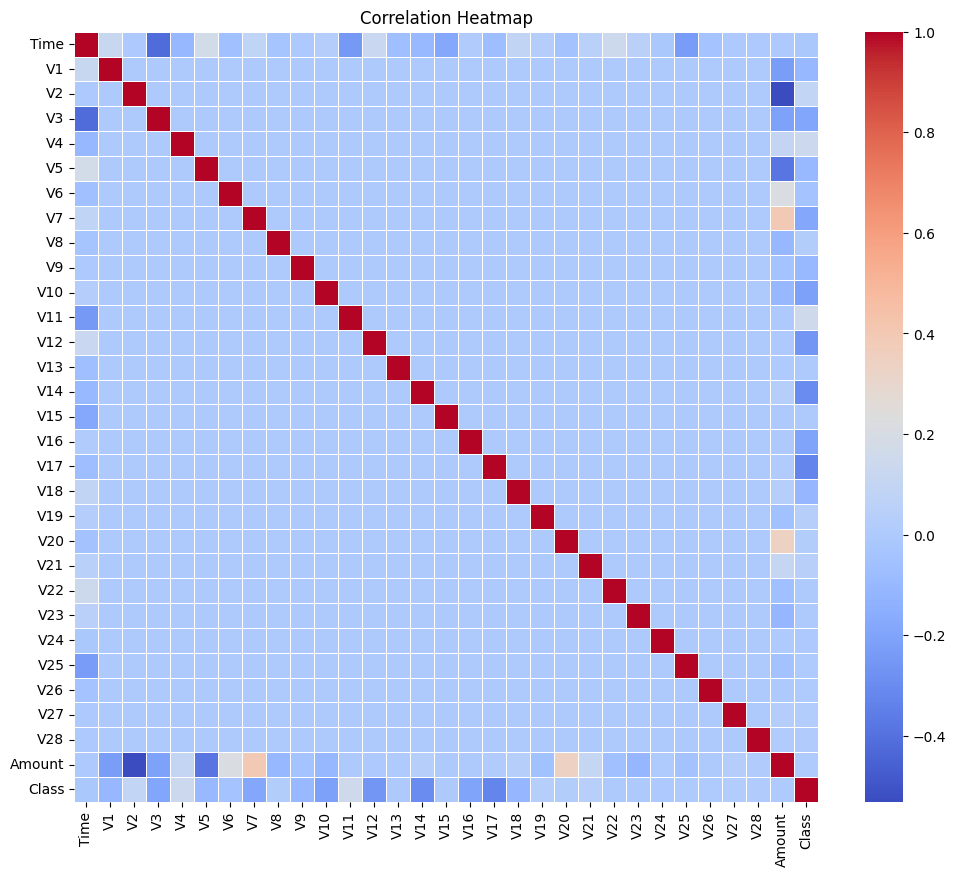

In [13]:
# Correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

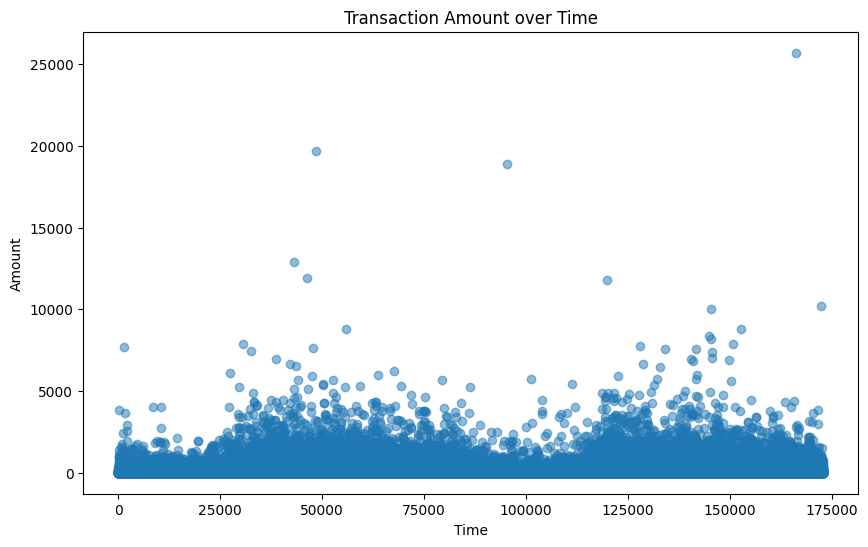

In [14]:
# Scatter plot between 'Amount' and 'Time' to detect patterns
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Amount'], alpha=0.5)
plt.title('Transaction Amount over Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

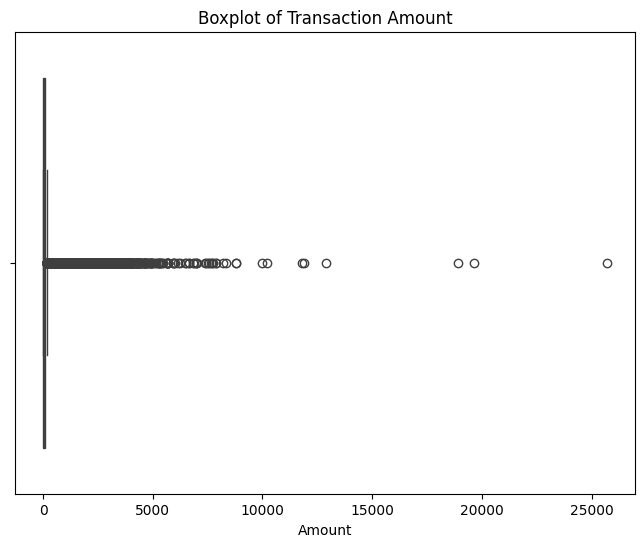

In [15]:
# Check for outliers in the 'Amount' feature
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

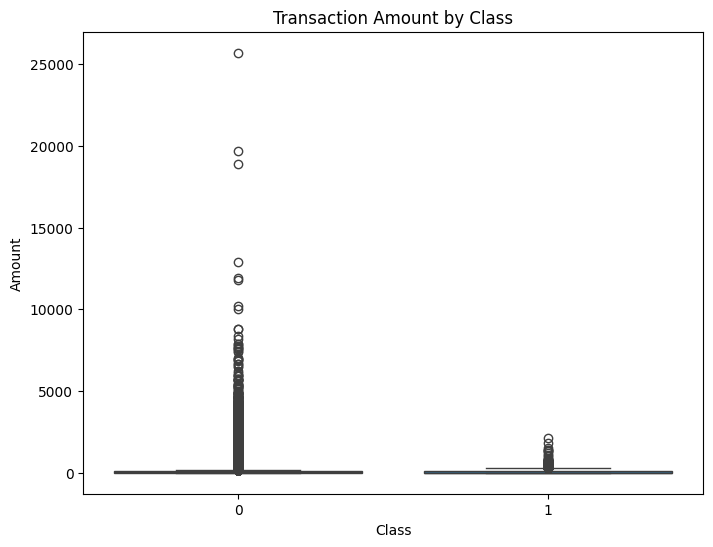

In [16]:
# Analyzing class distribution with respect to 'Amount'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()